In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [18]:
'''
i made this function becouse df.info() was not showing information 
'''

def get_df_info(df:pd.DataFrame,cleaning:bool=False,
                col:list=[],show_all=False,min_persent:int=50,
                columns_to_map:list=[],col_refrence:dict={}):
    '''
    this function print specific infromation about the data do some cleaning
    
    '''
    del_col=[]
    if not show_all:
        print('showing all information is off')
    if cleaning:
        df=cleaning_df(df,col,columns_to_map,col_refrence)
    lenth=len(df)
    print('num of columns:', len(df.columns))
    print('num of rows: ',lenth)
    print('Col Name'.ljust(30), 'type'.ljust(13),'misssing values'.ljust(25), 'unique or nunique', ' max','min')
    print('__'*40)
    for i in df.columns:
        persent=round((df[f"{i}"].isnull().sum()/lenth)*100)
        nunique=df[f"{i}"].nunique()
        if persent == 0 and not show_all:
            continue
        else:
            print(i.ljust(30), str(df[f'{i}'].dtype).ljust(15),\
            str(df[f'{i}'].isnull().sum()).ljust(10),\
                f'{persent}%'.ljust(20),
                df[f"{i}"].unique() if  nunique<=3 else nunique,''.ljust(10),\
                  (df[f"{i}"].max(), df[f"{i}"].min()) if df[f"{i}"].dtype in ['int64','float64'] else ' ' )
            if persent>=min_persent:
                del_col.append(i)
    if cleaning:
    
        return df,col_refrence, del_col
    return df,col_refrence,del_col

In [3]:
def days_to_year(days_ago):
    return abs(int(days_ago / 365.25)) # Considering leap years

def get_column_info(df,col):
    vc=df[col].value_counts()
    print(vc)
    print('min:',df[col].min() if df[col].dtype !='object' else 'object has no min')
    print('max:',df[col].max()  if df[col].dtype !='object' else 'object has no max')
    print('null values:',df[col].isna().sum())

In [4]:
# reading csv files
col_description=pd.read_csv('columns_description.csv')
application_data=pd.read_csv('application_data.csv')
previous_application=pd.read_csv('previous_application.csv')

### Exploring Columns Description

In [5]:
col_description.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160 entries, 0 to 159
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   160 non-null    int64 
 1   Table        160 non-null    object
 2   Row          160 non-null    object
 3   Description  160 non-null    object
 4   Special      69 non-null     object
dtypes: int64(1), object(4)
memory usage: 6.4+ KB


In [6]:
print('                    Table : application_data')
print('__'*30)
print()

for i in range(len(col_description)):
    if 'application_data' in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

                    Table : application_data
____________________________________________________________

1-row name : SK_ID_CURR 
description: ID of loan in our sample
special : nan
____________________________________________________________

2-row name : TARGET 
description: Target variable (1 - client with payment difficulties: he/she had late payment more than X days on at least one of the first Y installments of the loan in our sample, 0 - all other cases)
special : nan
____________________________________________________________

3-row name : NAME_CONTRACT_TYPE 
description: Identification if loan is cash or revolving
special : nan
____________________________________________________________

4-row name : CODE_GENDER 
description: Gender of the client
special : nan
____________________________________________________________

5-row name : FLAG_OWN_CAR 
description: Flag if the client owns a car
special : nan
____________________________________________________________

6-row na

In [7]:

for i in range(60,len(col_description)):
    if 'application_data' in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

61-row name : YEARS_BEGINEXPLUATATION_MODE 
description: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
special : normalized
____________________________________________________________

62-row name : YEARS_BUILD_MODE 
description: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffix) apartment size, common area, living area, age of building, number of elevators, number of entrances, state of the building, number of floor
special : normalized
____________________________________________________________

63-row name : COMMONAREA_MODE 
description: Normalized information about building where the client lives, What is average (_AVG suffix), modus (_MODE suffix), median (_MEDI suffi

In [8]:

for i in range(120,len(col_description)):
    if 'application_data' in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

121-row name : AMT_REQ_CREDIT_BUREAU_QRT 
description: Number of enquiries to Credit Bureau about the client 3 month before application (excluding one month before application)
special : nan
____________________________________________________________

122-row name : AMT_REQ_CREDIT_BUREAU_YEAR 
description: Number of enquiries to Credit Bureau about the client one day year (excluding last 3 months before application)
special : nan
____________________________________________________________



In [9]:
print('                    Table : previous_application')
print('__'*30)
print()

for i in range(len(col_description)):
    if 'application_data' not in col_description.Table[i]:
        print(f'{i+1}-row name :', col_description.Row[i],'\ndescription:',col_description.Description[i])
        print(f'special : {col_description.Special[i]}' if col_description.Special[i] !='nan' else '')
        print('__'*30)
        print()

                    Table : previous_application
____________________________________________________________

123-row name : SK_ID_PREV  
description: ID of previous credit in Home credit related to loan in our sample. (One loan in our sample can have 0,1,2 or more previous loan applications in Home Credit, previous application could, but not necessarily have to lead to credit) 
special : hashed
____________________________________________________________

124-row name : SK_ID_CURR 
description: ID of loan in our sample
special : hashed
____________________________________________________________

125-row name : NAME_CONTRACT_TYPE 
description: Contract product type (Cash loan, consumer loan [POS] ,...) of the previous application
special : nan
____________________________________________________________

126-row name : AMT_ANNUITY 
description: Annuity of previous application
special : nan
____________________________________________________________

127-row name : AMT_APPLICATION 
d

In [10]:
def converting_col_to_category(df):
    col=df.columns
    for i in col:
        if df[f'{i}'].nunique()==2:
            pass

### Main Data Files

##### searching for similar columns in 2 files

In [12]:
# looking for similar columns
c=[]
for i in previous_application.columns:
    for j in application_data.columns:
        if i ==j:
            c.append(i)
            break
c

['SK_ID_CURR',
 'NAME_CONTRACT_TYPE',
 'AMT_ANNUITY',
 'AMT_CREDIT',
 'AMT_GOODS_PRICE',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'NAME_TYPE_SUITE']

In [13]:
previous_application[c].info(),application_data[c].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 8 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   SK_ID_CURR                  1670214 non-null  int64  
 1   NAME_CONTRACT_TYPE          1670214 non-null  object 
 2   AMT_ANNUITY                 1297979 non-null  float64
 3   AMT_CREDIT                  1670213 non-null  float64
 4   AMT_GOODS_PRICE             1284699 non-null  float64
 5   WEEKDAY_APPR_PROCESS_START  1670214 non-null  object 
 6   HOUR_APPR_PROCESS_START     1670214 non-null  int64  
 7   NAME_TYPE_SUITE             849809 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 101.9+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 8 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   SK_

(None, None)

### Cleaning Data

In [58]:
# merging Data files on ID
df= previous_application.merge(application_data,how='inner',on='SK_ID_CURR',suffixes=('_prev','_curr'))

In [33]:
def mapping_col(df,col_name,col_refrence):
    '''
    this function take column name and map it into numbers
    '''
    mapping={}
    c=0
    for i in df[col_name].unique():
        mapping[i]=c
        c+=1
    df[col_name] = df[col_name].map(mapping)
    col_refrence[col_name]=mapping
    return df,col_refrence


In [57]:
# i made this function by running get_df_info function and look for each column how to clean it
def cleaning_df(df,col,columns_to_map:list=[],col_refrence:dict={}):
    # cleaning gender column
    df= df[df['CODE_GENDER'] != 'XNA']
    df=df[df['DAYS_EMPLOYED'] < 14610] # worked for 40 year
    df=df[df['DAYS_EMPLOYED'] > -10957.5] # unemplyed for 30 year
  # fill na
    ############################################################################
    df['OWN_CAR_AGE'].fillna(-1,inplace=True)
    df['AMT_GOODS_PRICE_prev'].fillna(-1,inplace=True)
    df['OCCUPATION_TYPE'].fillna('Laborers',inplace=True)
    df['NAME_TYPE_SUITE_curr'].fillna('Unaccompanied',inplace=True)
    df['NFLAG_INSURED_ON_APPROVAL'].fillna(1,inplace=True)
    
    # mapping columns
    for column in columns_to_map:
        if len(col_refrence)!= len(columns_to_map):
            df ,col_refrence= mapping_col(df, column,col_refrence)
    
    df.loc[:,'NAME_CONTRACT_TYPE_prev'] =df['NAME_CONTRACT_TYPE_prev'].replace({'XNA':1})
    
    ############################################################################
    if 'EXT_SOURCE_1' in df.columns:
        # df=predict_missing_values(df,'EXT_SOURCE_3','EXT_SOURCE_2')
        # df=predict_missing_values(df,'EXT_SOURCE_1','EXT_SOURCE_2')
        mean=df['EXT_SOURCE_3'].mean()
        df['EXT_SOURCE_3'].fillna(mean,inplace=True)
        df['EXT_SOURCE_1'].fillna(0,inplace=True)
        df['EXT_SOURCE']= (df['EXT_SOURCE_1']+df['EXT_SOURCE_2']+df['EXT_SOURCE_3'])/3
        df.drop(columns=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)
        df['EXT_SOURCE'].fillna(df['EXT_SOURCE'].mean(),inplace=True)
        
        
    if 'AGE' not in df.columns:
        df['AGE']=df['DAYS_BIRTH'].apply(days_to_year)
    
    # DRopping columns
    df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_QRT'],inplace=True)
    df.dropna(subset=['CNT_PAYMENT'],inplace=True)
    for i in col:
        if i in df.columns:
          df.drop(columns=[i],inplace=True)
    
    for i in df.columns:
            if '_MODE' in i or '_MEDI' in i:
                df.drop(columns=[i],inplace=True)
        
    return df 
    

In [17]:
# old vesion
def cleaning_df_v2(df,col):
    # cleaning gender column
    df= df[df['CODE_GENDER'] != 'XNA']
    df=df[df['DAYS_EMPLOYED'] < 14610] # worked for 40 year
    df=df[df['DAYS_EMPLOYED'] > -10957.5] # unemplyed for 30 year
    # df=df[(df['DAYS_FIRST_DRAWING'].isna()) | (df['DAYS_FIRST_DRAWING'] < 10,957.5)] # first drwaing at least from 30 year
    
    mapping= {'F':0,"M":1}
    df.loc[:, 'CODE_GENDER']=df['CODE_GENDER'].replace(mapping)
    col_referance['CODE_GENDER']=mapping
    
    mapping= {'N':0,"Y":1}
    df.loc[:,'NAME_CONTRACT_TYPE_prev'] =df['NAME_CONTRACT_TYPE_prev'].replace({'XNA':1})
    
    df.loc[:, 'FLAG_OWN_CAR'] =df['FLAG_OWN_CAR'].replace(mapping)
    df.loc[:, 'FLAG_OWN_REALTY'] =df['FLAG_OWN_REALTY'].replace(mapping)
    df.loc[:, 'FLAG_LAST_APPL_PER_CONTRACT'] =df['FLAG_LAST_APPL_PER_CONTRACT'].replace(mapping)
    # fill na
    ############################################################################
    df['OWN_CAR_AGE'].fillna(-1,inplace=True)
    df['NFLAG_INSURED_ON_APPROVAL'].fillna(1,inplace=True)
    # df['WALLSMATERIAL_MODE'].fillna('Others',inplace=True)
    ############################################################################
    if 'EXT_SOURCE_1' in df.columns:
        # df=predict_missing_values(df,'EXT_SOURCE_3','EXT_SOURCE_2')
        # df=predict_missing_values(df,'EXT_SOURCE_1','EXT_SOURCE_2')
        mean=df['EXT_SOURCE_3'].mean()
        df['EXT_SOURCE_3'].fillna(mean,inplace=True)
        df['EXT_SOURCE_1'].fillna(0,inplace=True)
        df['EXT_SOURCE']= (df['EXT_SOURCE_1']+df['EXT_SOURCE_2']+df['EXT_SOURCE_3'])/3
        df.drop(columns=['EXT_SOURCE_1','EXT_SOURCE_2','EXT_SOURCE_3'],inplace=True)
    if 'AGE' not in df.columns:
        df['AGE']=df['DAYS_BIRTH'].apply(days_to_year)
        df.drop(columns=['DAYS_BIRTH'],inplace=True)
        
   

    mapping={
        'XNA':-1 ,'walk-in':0, 'x-sell':1
    }
    df.loc[:, 'NAME_PRODUCT_TYPE'] = df['NAME_PRODUCT_TYPE'].replace(mapping)
    col_referance['NAME_PRODUCT_TYPE']=mapping
    
    mapping={
        'Cash loans':0,
        'Revolving loans':1,
        'Consumer loans':2
    }
   
    if 'WEEKDAY_NUM' not in df.columns:
        mapping = {
    'Saturday': 1,
    'Sunday': 2,
    'Monday':3,
    'Tuesday': 4,
    'Wednesday': 5,
    'Thursday': 6,
    'Friday': 7,
}
    # Apply the mapping to the 'days' column
        df.loc[:, 'WEEKDAY_APPR_PROCESS_START_prev'] = df['WEEKDAY_APPR_PROCESS_START_prev'].replace(mapping)
        df.loc[:, 'WEEKDAY_APPR_PROCESS_START_curr'] = df['WEEKDAY_APPR_PROCESS_START_curr'].replace(mapping)
        col_referance['WEEKDAY_APPR_PROCESS_START_curr']=mapping
        weekday_mapping = {
        'MONDAY': 1,
        'TUESDAY': 2,
        'WEDNESDAY': 3,
        'THURSDAY': 4,
        'FRIDAY': 5,
        'SATURDAY': 6,
        'SUNDAY': 7
        }
        df['WEEKDAY_NUM'] = df['WEEKDAY_APPR_PROCESS_START_curr'].map(weekday_mapping)
        df.drop(columns=['WEEKDAY_APPR_PROCESS_START_curr'],inplace=True)
    
    df.loc[:, 'NAME_CONTRACT_TYPE_curr'] = df['NAME_CONTRACT_TYPE_curr'].replace(mapping)
    df.loc[:, 'NAME_CONTRACT_TYPE_prev']  = df['NAME_CONTRACT_TYPE_prev'].replace(mapping)
    if 'AMT_REQ_CREDIT_BUREAU_DAY' in df.columns:
        df.dropna(subset=['AMT_REQ_CREDIT_BUREAU_DAY'], inplace=True)
  
        
    col_referance['NAME_CONTRACT_TYPE_curr']=mapping
    
    # changing types
    df['NAME_CONTRACT_TYPE_prev']=df['NAME_CONTRACT_TYPE_prev'].astype('int32')
    df['FLAG_LAST_APPL_PER_CONTRACT']=df['FLAG_LAST_APPL_PER_CONTRACT'].astype('int32')
    
    # DRopping columns
    for i in col:
        if i in df.columns:
          df.drop(columns=[i],inplace=True)
    
    for i in df.columns:
            if '_MODE' in i or '_MEDI' in i:
                df.drop(columns=[i],inplace=True)
        
    return df ,col_referance
    

In [18]:
# df.dropna(inplace=True)
# remain 29000 ~ from 1.2 m
# get_df_info(df,show_all=True)


In [59]:
'''dropping column done based on 
    1-persent of missing values
    2-imbalance in data
    3-not improtant of column
    3-changing data inside column into new column and removing old
'''
drop_columns=['FLOORSMAX_AVG','AMT_REQ_CREDIT_BUREAU_DAY','DAYS_BIRTH','DAYS_TERMINATION'
              ,'DAYS_FIRST_DUE','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE_1ST_VERSION','DAYS_LAST_DUE' # مش هتفرق اوي امتي اخراو اول مره عمل طلب
              ,'COMMONAREA_AVG','FLAG_DOCUMENT_4','FLAG_DOCUMENT_5','FLAG_DOCUMENT_7','FLAG_DOCUMENT_10','FLAG_DOCUMENT_12',
              'FLAG_DOCUMENT_6','FLAG_DOCUMENT_9','FLAG_DOCUMENT_11','FLAG_DOCUMENT_13','FLAG_DOCUMENT_14',
              'FLAG_DOCUMENT_15','FLAG_DOCUMENT_16','FLAG_DOCUMENT_17','FLAG_DOCUMENT_21','FLAG_EMAIL',
              'FLAG_CONT_MOBILE','FLAG_EMP_PHONE',
              'FLAG_DOCUMENT_20','FLAG_DOCUMENT_19',
              'FLAG_DOCUMENT_18','FLAG_MOBIL','FLAG_LAST_APPL_PER_CONTRACT',
              'RATE_INTEREST_PRIMARY','FLAG_DOCUMENT_2','RATE_INTEREST_PRIVILEGED','DAYS_FIRST_DRAWING']

fillna_col={'CNT_PAYMENT':'model',
            'OWN_CAR_AGE':-1,
            'EXT_SOURCE_1':0,
            'OCCUPATION_TYPE':'Laborers',
            'NFLAG_INSURED_ON_APPROVAL':0,
            # 'NAME_TYPE_SUITE_prev':
            # 'EXT_SOURCE_3':mean
            }

columns_to_map = ['ORGANIZATION_TYPE','OCCUPATION_TYPE',
    'WEEKDAY_APPR_PROCESS_START_prev','NAME_CONTRACT_STATUS',
    'WEEKDAY_APPR_PROCESS_START_curr',
    'NAME_CONTRACT_TYPE_curr','NAME_INCOME_TYPE',
    'NAME_PRODUCT_TYPE','NAME_HOUSING_TYPE',
    'NAME_CONTRACT_TYPE_prev','CODE_REJECT_REASON',
    'FLAG_OWN_CAR','CODE_GENDER','NAME_YIELD_GROUP',
    'FLAG_OWN_REALTY','NAME_GOODS_CATEGORY'
    ,'NAME_PAYMENT_TYPE','NAME_PORTFOLIO','NAME_FAMILY_STATUS',
    'NAME_EDUCATION_TYPE','NAME_TYPE_SUITE_curr',
    'CHANNEL_TYPE','NAME_CLIENT_TYPE','NAME_CASH_LOAN_PURPOSE','NAME_SELLER_INDUSTRY','PRODUCT_COMBINATION'
]
# to apply del_col run the code twice
col_refrence={}


In [62]:


df,col_refrence,drop_columns=get_df_info(df,cleaning=True
                                              ,col=drop_columns,show_all=False
                                              ,min_persent=30,
                                              columns_to_map=columns_to_map,col_refrence=col_refrence)

df,_,drop_columns=get_df_info(df,cleaning=True
                                              ,col=drop_columns,show_all=False
                                              ,min_persent=30,
                                              columns_to_map=columns_to_map)

showing all information is off
num of columns: 75
num of rows:  783241
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________
showing all information is off
num of columns: 75
num of rows:  783241
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________


In [63]:
col_refrence

{'ORGANIZATION_TYPE': {'Military': 0,
  'Self-employed': 1,
  'Postal': 2,
  'Security Ministries': 3,
  'Business Entity Type 3': 4,
  'Housing': 5,
  'Industry: type 3': 6,
  'Security': 7,
  'Kindergarten': 8,
  'Transport: type 3': 9,
  'Government': 10,
  'Restaurant': 11,
  'Trade: type 3': 12,
  'Medicine': 13,
  'Business Entity Type 1': 14,
  'Other': 15,
  'Bank': 16,
  'Trade: type 7': 17,
  'Trade: type 2': 18,
  'Transport: type 4': 19,
  'Business Entity Type 2': 20,
  'Construction': 21,
  'Industry: type 9': 22,
  'Transport: type 1': 23,
  'Agriculture': 24,
  'School': 25,
  'Services': 26,
  'Religion': 27,
  'Industry: type 1': 28,
  'Industry: type 11': 29,
  'Industry: type 7': 30,
  'Police': 31,
  'Hotel': 32,
  'Telecom': 33,
  'Industry: type 4': 34,
  'Transport: type 2': 35,
  'University': 36,
  'Cleaning': 37,
  'Industry: type 13': 38,
  'Advertising': 39,
  'Legal Services': 40,
  'Industry: type 5': 41,
  'Industry: type 12': 42,
  'Industry: type 2': 4

In [20]:
for i in range(3,22):
    if f'FLAG_DOCUMENT_{i}' in df.columns:
        get_column_info(df,f'FLAG_DOCUMENT_{i}')


FLAG_DOCUMENT_3
1    621319
0    161922
Name: count, dtype: int64
min: 0
max: 1
null values: 0
FLAG_DOCUMENT_8
0    711870
1     71371
Name: count, dtype: int64
min: 0
max: 1
null values: 0
FLAG_DOCUMENT_20
0    782870
1       371
Name: count, dtype: int64
min: 0
max: 1
null values: 0


In [21]:
col=df.columns
for i in col:
    if f'FLAG_' in i:
        get_column_info(df,i)
        print('__'*30)

NFLAG_LAST_APPL_IN_DAY
1    779555
0      3686
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
NFLAG_INSURED_ON_APPROVAL
0.0    414004
1.0    369237
Name: count, dtype: int64
min: 0.0
max: 1.0
null values: 0
____________________________________________________________
FLAG_OWN_CAR
0    478828
1    304413
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_OWN_REALTY
0    549969
1    233272
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_EMP_PHONE
1    783213
0        28
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_WORK_PHONE
0    598681
1    184560
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
FLAG_PHONE
0    554577
1    228664
Name: co

In [22]:
col=df.columns
for i in col:
    if f'CITY' in i:
        get_column_info(df,i)
        print('__'*30)

REGION_RATING_CLIENT_W_CITY
2    595084
3    106641
1     81516
Name: count, dtype: int64
min: 1
max: 3
null values: 0
____________________________________________________________
REG_CITY_NOT_LIVE_CITY
0    717664
1     65577
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
REG_CITY_NOT_WORK_CITY
0    568499
1    214742
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________
LIVE_CITY_NOT_WORK_CITY
0    613808
1    169433
Name: count, dtype: int64
min: 0
max: 1
null values: 0
____________________________________________________________


In [23]:
get_column_info(df,'NAME_YIELD_GROUP')

NAME_YIELD_GROUP
2    226944
0    222405
1    186370
3     91254
4     56268
Name: count, dtype: int64
min: 0
max: 4
null values: 0


In [24]:
# g=df['CODE_GENDER'].value_counts()
# g
# g=df['NAME_PRODUCT_TYPE'].value_counts()
# g=df['EMERGENCYSTATE_MODE'].value_counts()
# g=df['WEEKDAY_APPR_PROCESS_START_prev'].value_counts()
# g=df['NAME_CONTRACT_TYPE_prev'].value_counts()
# g=df[''].value_counts()
# g=df['HOUSETYPE_MODE'].value_counts()


###  making visual and chossing col

In [25]:
df,del_col=get_df_info(df,cleaning=False,col=[],show_all=True)


num of columns: 77
num of rows:  783241
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________
SK_ID_PREV                     int64           0          0%                   783241            (2845379, 1000003)
SK_ID_CURR                     int64           0          0%                   203517            (456255, 100002)
NAME_CONTRACT_TYPE_prev        int64           0          0%                   [0 1 2]            (2, 0)
AMT_ANNUITY_prev               float64         3          0%                   276472            (418058.145, 0.0)
AMT_APPLICATION                float64         0          0%                   72364            (5850000.0, 0.0)
AMT_CREDIT_prev                float64         0          0%                   71712            (4509688.5, 0.0)
AMT_GOODS_PRICE_prev           float64         0          0%                   72365            (5850000.

In [26]:
for col in df.columns:
    # Check if the column contains numeric data
    if pd.api.types.is_numeric_dtype(df[col]):
        # Fill missing values with the mean of the column
        df[col].fillna(df[col].mean(), inplace=True)

In [27]:
df,del_col=get_df_info(df,cleaning=False,col=[],show_all=True)

num of columns: 77
num of rows:  783241
Col Name                       type          misssing values           unique or nunique  max min
________________________________________________________________________________
SK_ID_PREV                     int64           0          0%                   783241            (2845379, 1000003)
SK_ID_CURR                     int64           0          0%                   203517            (456255, 100002)
NAME_CONTRACT_TYPE_prev        int64           0          0%                   [0 1 2]            (2, 0)
AMT_ANNUITY_prev               float64         0          0%                   276473            (418058.145, 0.0)
AMT_APPLICATION                float64         0          0%                   72364            (5850000.0, 0.0)
AMT_CREDIT_prev                float64         0          0%                   71712            (4509688.5, 0.0)
AMT_GOODS_PRICE_prev           float64         0          0%                   72365            (5850000.

### some insights 

In [28]:
df.describe()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE_prev,AMT_ANNUITY_prev,AMT_APPLICATION,AMT_CREDIT_prev,AMT_GOODS_PRICE_prev,WEEKDAY_APPR_PROCESS_START_prev,HOUR_APPR_PROCESS_START_prev,NFLAG_LAST_APPL_IN_DAY,...,FLAG_DOCUMENT_3,FLAG_DOCUMENT_8,FLAG_DOCUMENT_20,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,EXT_SOURCE,AGE
count,7.832410e+05,783241.000000,783241.000000,783241.000000,7.832410e+05,7.832410e+05,7.832410e+05,783241.000000,783241.000000,783241.000000,...,783241.000000,783241.000000,783241.000000,783241.000000,783241.000000,783241.000000,783241.000000,783241.000000,783241.000000,783241.000000
mean,1.913730e+06,278349.277483,0.560204,15866.429955,2.198670e+05,2.479448e+05,2.199054e+05,3.041180,12.763678,0.995294,...,0.793267,0.091123,0.000474,0.006457,0.037776,0.320839,0.314031,2.599409,0.413320,40.435498
std,5.341246e+05,102924.817747,0.692382,15027.481134,3.227852e+05,3.501836e+05,3.228110e+05,2.015916,3.345410,0.068439,...,0.404963,0.287784,0.021759,0.083480,0.209877,1.019854,0.983845,2.071083,0.138787,9.734744
min,1.000003e+06,100002.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000179,20.000000
25%,1.446762e+06,189077.000000,0.000000,6089.310000,4.500000e+04,4.998600e+04,4.500000e+04,1.000000,10.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.317586,33.000000
50%,1.909732e+06,278448.000000,0.000000,11025.000000,9.989550e+04,1.131570e+05,9.989550e+04,3.000000,13.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.405917,40.000000
75%,2.377116e+06,367680.000000,1.000000,20480.175000,2.250000e+05,2.700000e+05,2.250000e+05,5.000000,15.000000,1.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.504016,48.000000
max,2.845379e+06,456255.000000,2.000000,418058.145000,5.850000e+06,4.509688e+06,5.850000e+06,6.000000,23.000000,1.000000,...,1.000000,1.000000,1.000000,4.000000,8.000000,27.000000,261.000000,23.000000,0.853417,68.000000


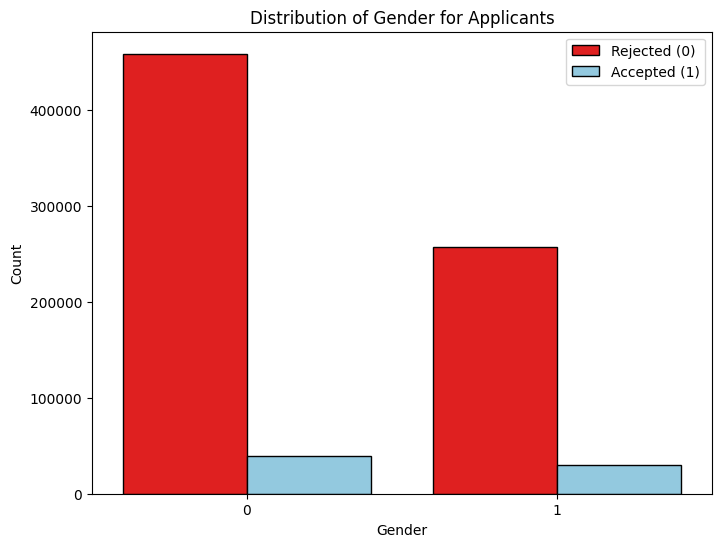

In [111]:

# Set up the figure and axis
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='CODE_GENDER', hue='TARGET', palette=['red', 'skyblue'], edgecolor='black')

plt.title('Distribution of Gender for Applicants')
plt.xlabel('Gender')
plt.ylabel('Count')

# Show the legend
plt.legend( labels=['Rejected (0)', 'Accepted (1)'])

# Rotate x-axis labels if needed
plt.xticks(rotation=0)

# Show the plot
plt.show()


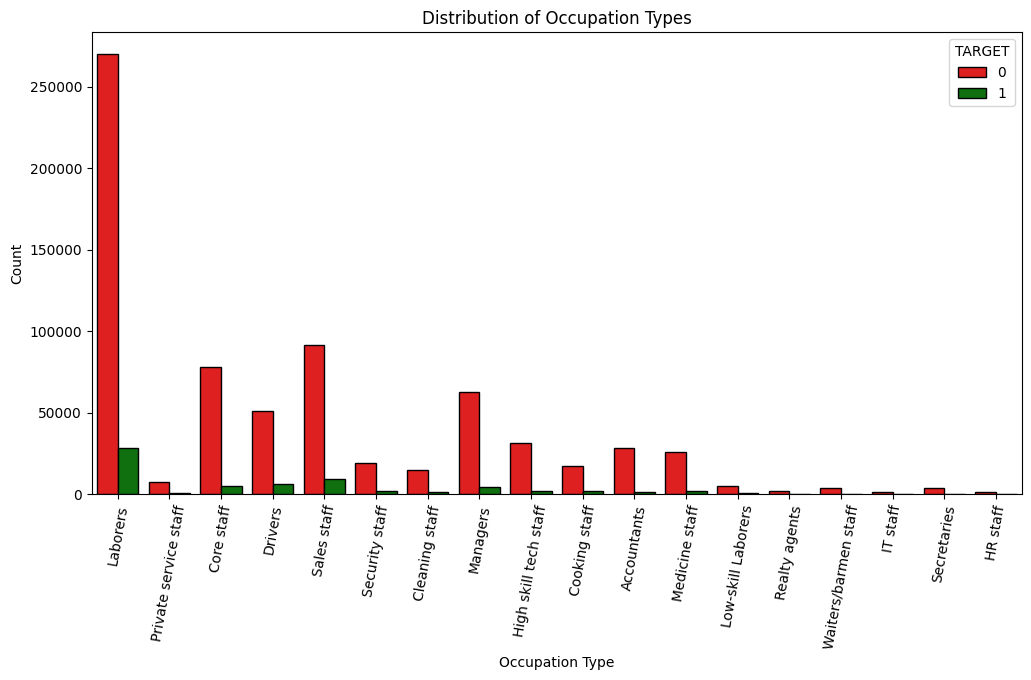

In [114]:

occupation_counts = df['OCCUPATION_TYPE'].value_counts().reset_index().rename(columns={'index': 'OCCUPATION_TYPE', 'OCCUPATION_TYPE': 'Count'})
occupation_counts = occupation_counts.sort_values(by='Count', ascending=False)

plt.figure(figsize=(12, 6)) 

sns.countplot(data=df, x='OCCUPATION_TYPE', hue='TARGET', palette=['red','green'], edgecolor='black')

new_labels = col_refrence['OCCUPATION_TYPE'] 

plt.xticks(range(len(new_labels)), new_labels, rotation=80)

plt.xlabel('Occupation Type')
plt.ylabel('Count')
plt.title('Distribution of Occupation Types')

plt.show()


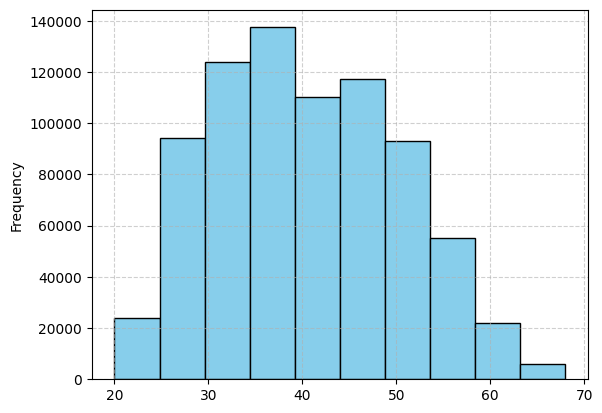

In [66]:
df['AGE'].plot(kind='hist', color='skyblue', edgecolor='black')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

 loaning starting to increace from 25 untill 40 
 then the starting decreace

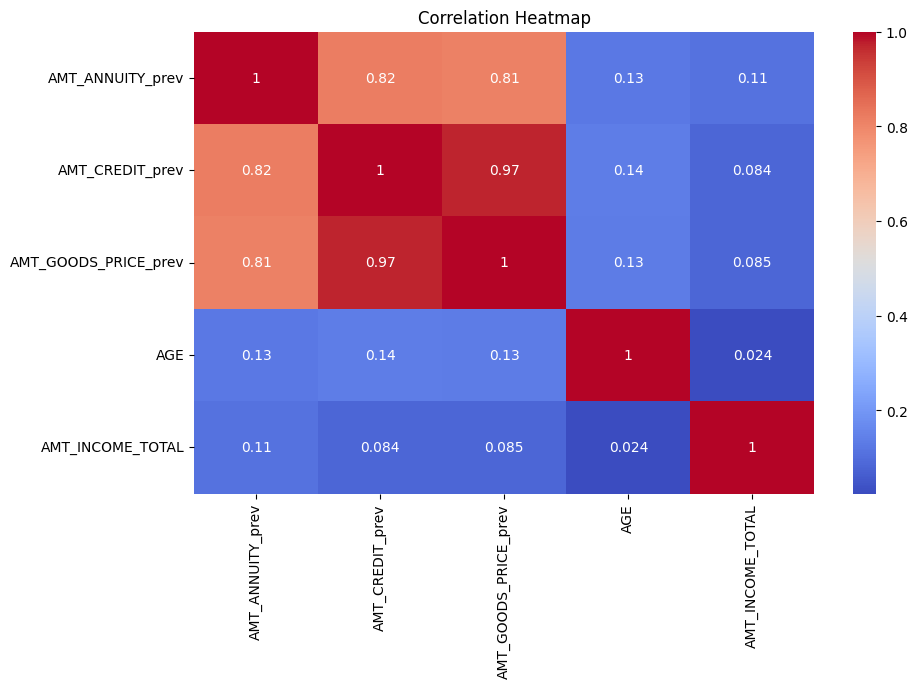

In [67]:
corr_matrix = df[['AMT_ANNUITY_prev', 'AMT_CREDIT_prev', 'AMT_GOODS_PRICE_prev','AGE', 'AMT_INCOME_TOTAL']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

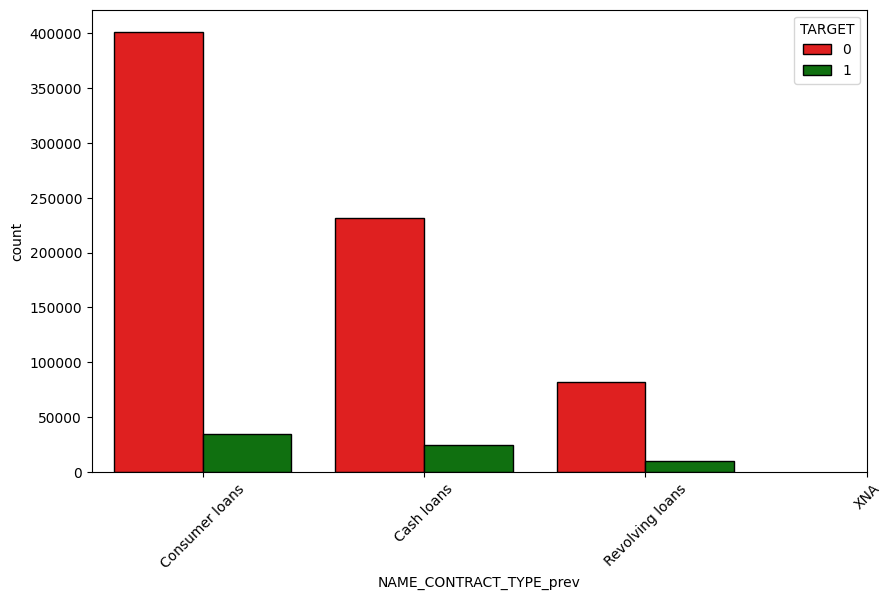

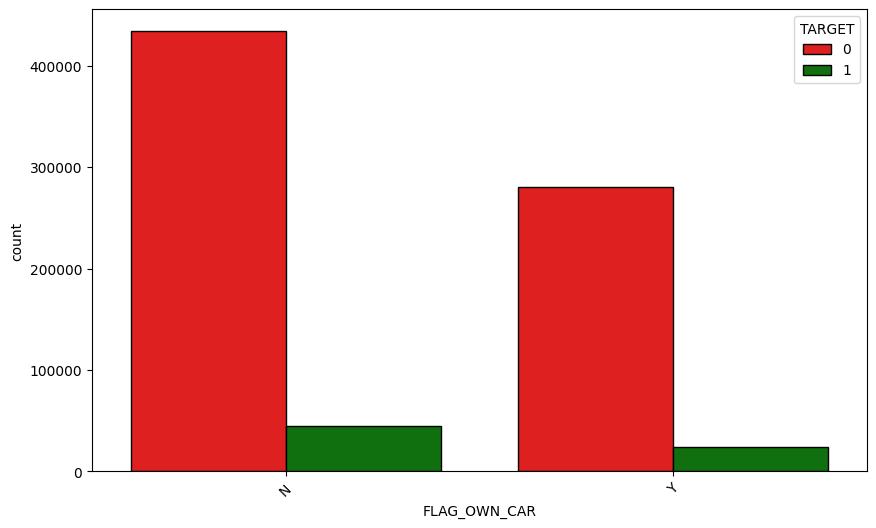

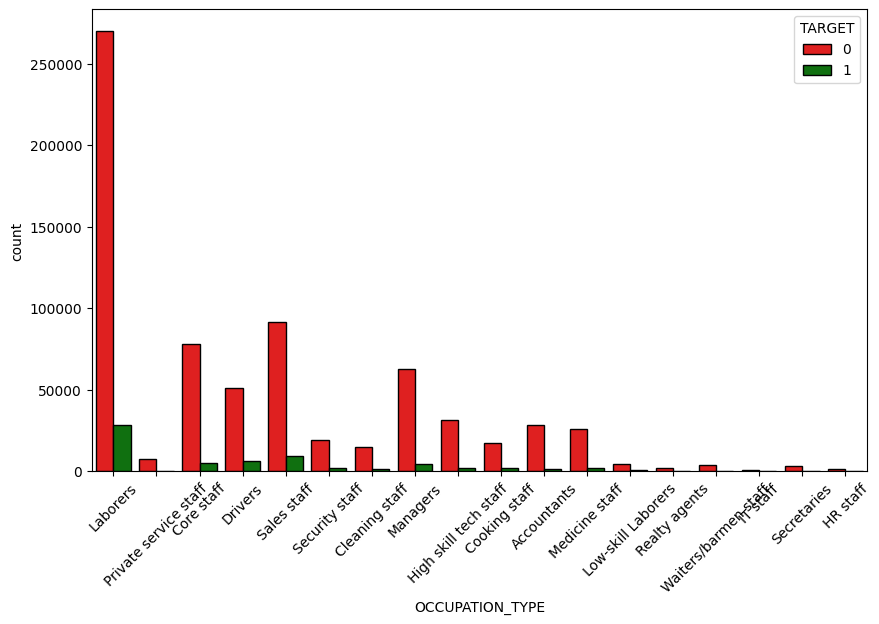

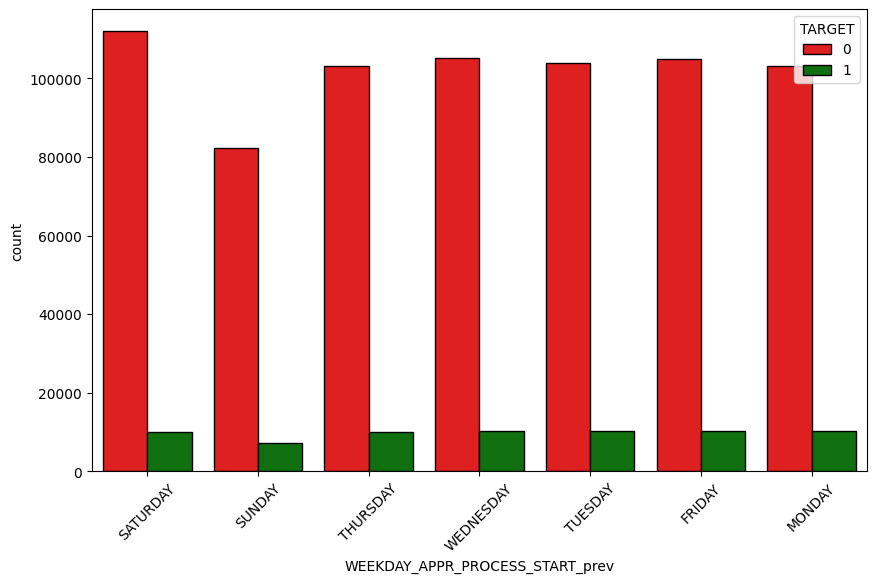

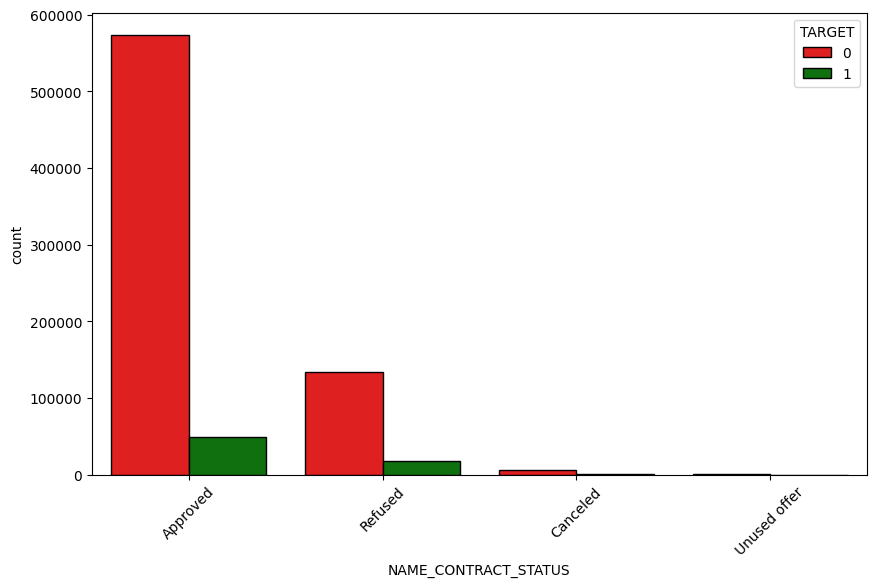

In [109]:
categorical_vars = ['NAME_CONTRACT_TYPE_prev','FLAG_OWN_CAR', 'OCCUPATION_TYPE','WEEKDAY_APPR_PROCESS_START_prev', 'NAME_CONTRACT_STATUS']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    # sns.countplot(x=var, data=df)
    sns.countplot(data=df, x=var, hue='TARGET', palette=['red', 'green'], edgecolor='black')
    plt.xticks(range(len(col_refrence[var])), col_refrence[var], rotation=45)
    plt.show()



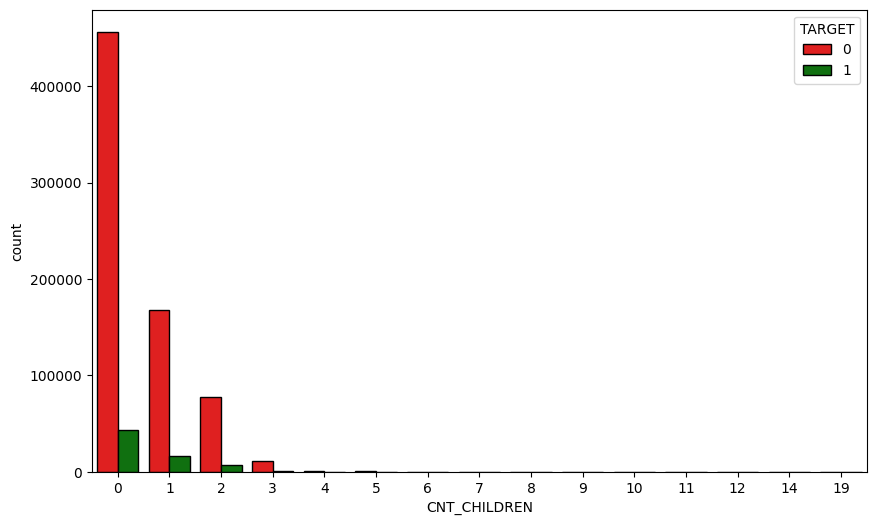

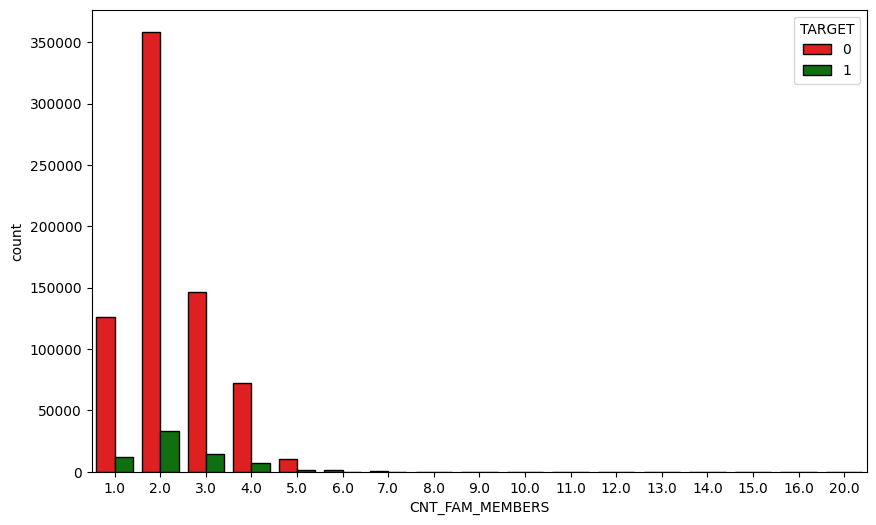

In [107]:

categorical_vars =['CNT_CHILDREN','CNT_FAM_MEMBERS']
for var in categorical_vars:
    plt.figure(figsize=(10, 6))
    # sns.countplot(x=var, data=df)
    sns.countplot(data=df, x=var, hue='TARGET', palette=[ 'red','green'], edgecolor='black')
    
    # plt.xticks(range(len(col_refrence[var])), col_refrence[var], rotation=45)
    
    plt.show()



In [108]:
df.drop(columns=['SK_ID_PREV','SK_ID_CURR'],inplace=True)


KeyError: "['SK_ID_PREV', 'SK_ID_CURR'] not found in axis"

### making model

In [91]:
important_featrures=[
                     'EXT_SOURCE',
                      'DAYS_EMPLOYED',
                     'DAYS_REGISTRATION',
                      'AMT_ANNUITY_curr',
                     'NAME_CONTRACT_TYPE_prev',
                     'AMT_CREDIT_curr',
                     'AMT_APPLICATION',
                     'DAYS_DECISION',
                     'CNT_CHILDREN',
                     'CODE_GENDER',
                     'AMT_INCOME_TOTAL',
                     'AGE',
                     'REGION_POPULATION_RELATIVE',
                     'OWN_CAR_AGE',
                     'ORGANIZATION_TYPE',
                     'CODE_REJECT_REASON',
                     'OCCUPATION_TYPE',
                     'WEEKDAY_APPR_PROCESS_START_curr',
                    'AMT_ANNUITY_prev',
                    'AMT_CREDIT_prev',
                     'DAYS_LAST_PHONE_CHANGE',
                     'CNT_FAM_MEMBERS',
                     'OBS_30_CNT_SOCIAL_CIRCLE',
                     'NAME_FAMILY_STATUS',
                     'AMT_CREDIT_prev'
                     ]
important_featrures=list(set(important_featrures))

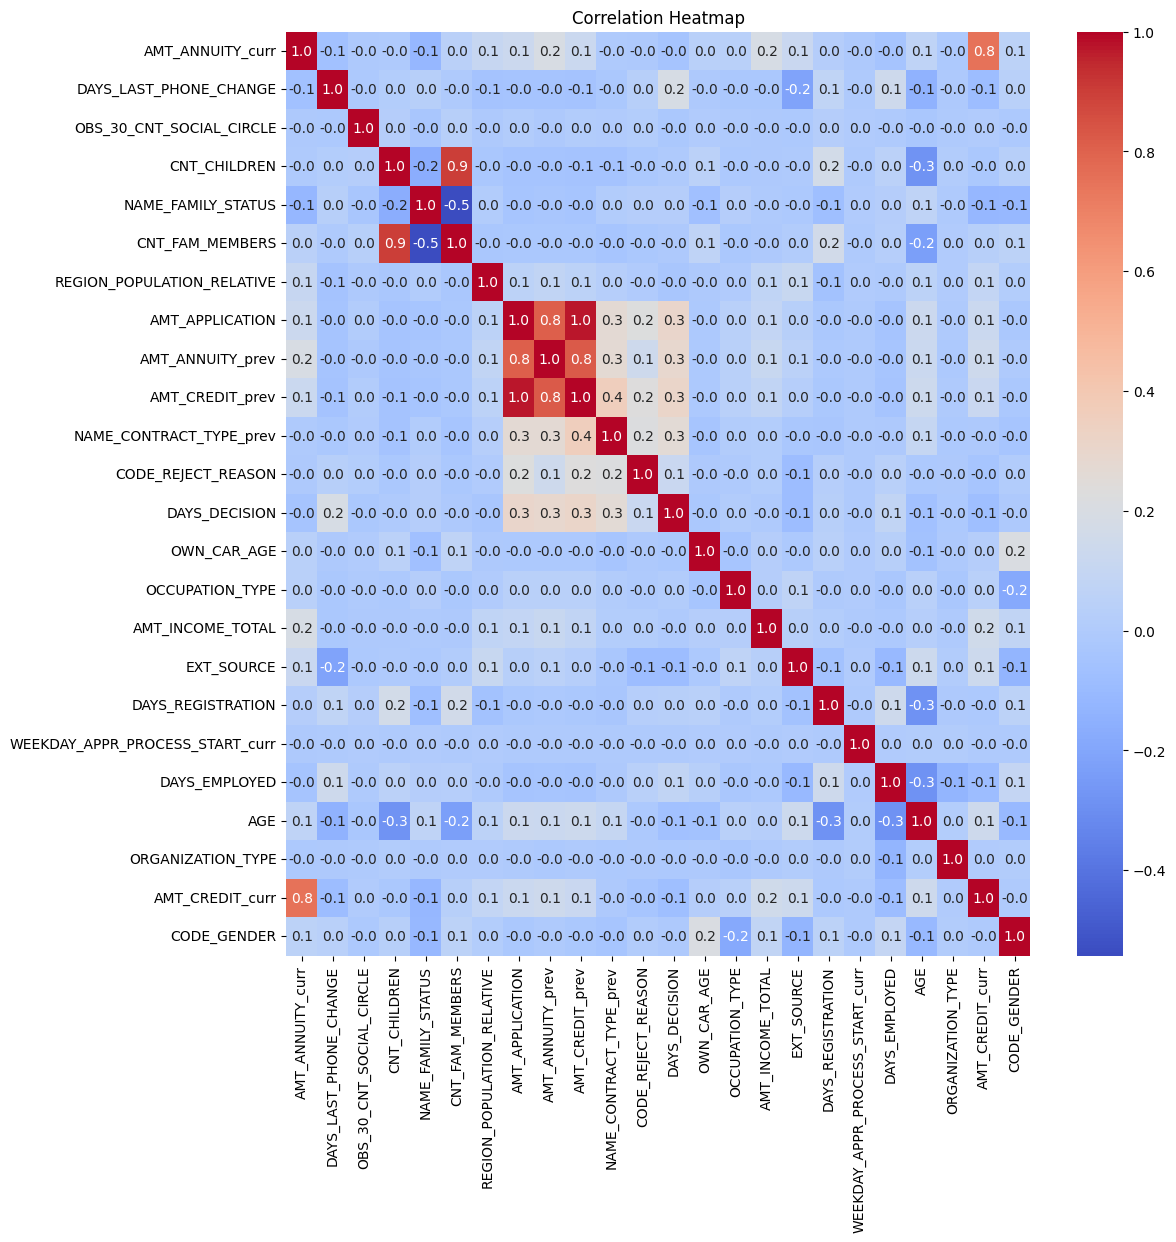

In [95]:
corr_matrix = df[important_featrures].corr()
plt.figure(figsize=(12, 12))
sns.heatmap(corr_matrix, annot=True, fmt='.1f', cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

from this Correlation Heatmap only 4 columns are so related to each others

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier,  StackingClassifier, AdaBoostClassifier


#### splitting data (use part of the data to make a model)

In [53]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

df2= df[:100000]
df3= df[100000:]

scaler = MinMaxScaler()
X=df2[important_featrures]
X_scaled = scaler.fit_transform(X)

y=df2['TARGET']

X_train ,X_test, y_train ,y_test = train_test_split(X_scaled,y,random_state=42,
                                                test_size=0.3,
                                                shuffle=True)
X_train ,X_val, y_train ,y_val = train_test_split(X_train,y_train,random_state=42,
                                                test_size=0.2
                                                )
X_train.shape , y_train.shape ,X_val.shape,y_val.shape

((56000, 24), (56000,), (14000, 24), (14000,))

In [64]:
X=df3[important_featrures]
X_scaled = scaler.fit_transform(X)

y=df3['TARGET']

X_train_full ,X_test, y_train_full ,y_test = train_test_split(X_scaled,y,random_state=42,
                                                test_size=1,
                                                shuffle=True)
X_train_full.shape , y_train_full.shape ,X_test.shape,y_test.shape

((683240, 24), (683240,), (1, 24), (1,))

In [62]:
56000*12#683240

672000

##### RandomForestClassifier

In [66]:
rf_classifier = RandomForestClassifier(
    n_estimators=100, 
    max_depth=None,   
    random_state=42   
)

# Train the Random Forest classifier on the training data
rf_classifier.fit(X_train, y_train)

# Make predictions on the test data
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

Accuracy: 1.00


In [67]:

y_pred = rf_classifier.predict(X_train_full)

# test the accuracy 
accuracy_score(y_train_full,y_pred)

0.9999985363854575

##### Building stacking classifier

In [46]:
# Define a list of base classifiers
base_classifiers = [
    # ('knn', KNeighborsClassifier()),
    # ('dt', DecisionTreeClassifier()),
  ('abc',  AdaBoostClassifier(n_estimators=10,)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(max_iter=1000, random_state=42)),
    # ('svm', SVC(probability=True, random_state=42))
]

sc = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=LogisticRegression(),
    cv=3
)

In [47]:
sc.fit(X_test,y_test)

StackingClassifier(cv=3,
                   estimators=[('abc', AdaBoostClassifier(n_estimators=10)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('lr',
                                LogisticRegression(max_iter=1000,
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

In [65]:

y_pred = sc.predict(X_train_full)

# test the accuracy 
accuracy_score(y_train_full,y_pred)

0.8942406767753645

#### Buliding deep leraning model

In [50]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import layers as L
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=5,          
    restore_best_weights=True  
)
model =Sequential([

          L.Dense(2048,activation='relu'),  
                L.Dropout(0.2),
             L.Dense(1024,activation='relu'),  
                L.Dropout(0.2),

 L.Dense(512,activation='relu'),  
                L.Dense(512,activation='relu'),  

            L.Dense(256,activation='relu'),  
           L.Dense(128,activation='relu',name='layer_0'),

                L.Dense(64,activation='relu',name='layer_1'),
                    L.Dropout(0.1),

            L.Dense(32,activation='relu',name='layer_2'),
            L.Dense(1,activation='sigmoid',name='output_layer'),

],name='Who_deserves_loan')
model.compile(  loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])
history=model.fit(X_train,y_train,
         validation_data=(X_val,y_val),
         epochs=100,
                 batch_size=128,
                  callbacks=[early_stopping])

Epoch 1/100
438/438 [==============================] - 9s 6ms/step - loss: 0.2935 - accuracy: 0.9092 - val_loss: 0.2833 - val_accuracy: 0.9114
Epoch 2/100
438/438 [==============================] - 2s 5ms/step - loss: 0.2820 - accuracy: 0.9107 - val_loss: 0.2768 - val_accuracy: 0.9114
Epoch 3/100
438/438 [==============================] - 2s 5ms/step - loss: 0.2808 - accuracy: 0.9108 - val_loss: 0.2758 - val_accuracy: 0.9114
Epoch 4/100
438/438 [==============================] - 2s 5ms/step - loss: 0.2769 - accuracy: 0.9106 - val_loss: 0.2737 - val_accuracy: 0.9114
Epoch 5/100
438/438 [==============================] - 2s 5ms/step - loss: 0.2750 - accuracy: 0.9107 - val_loss: 0.2786 - val_accuracy: 0.9114
Epoch 6/100
438/438 [==============================] - 2s 6ms/step - loss: 0.2721 - accuracy: 0.9108 - val_loss: 0.2728 - val_accuracy: 0.9114
Epoch 7/100
438/438 [==============================] - 2s 5ms/step - loss: 0.2698 - accuracy: 0.9111 - val_loss: 0.2678 - val_accuracy: 0.9116

In [56]:
preds=model.evaluate(X_train_full,y_train_full)
preds

21352/21352 [==============================] - 51s 2ms/step - loss: 0.6138 - accuracy: 0.8835


[0.6137574911117554, 0.8834670186042786]

In [68]:
X_train_full.shape

(683240, 24)

###  models Results
 Deep Learning:testing the model on data bigger than train data 12X and got           88.3% accuarcy <br>
 stacking classifier:testing the model on data bigger than train data 12X and got     89.4% accuarcy<br>
 RandomForestClassifier: testing the model on data bigger than train data 12X and got 99.8% accuarcy

## Conclusion